In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vijaymakkad","key":"aed791f831475cc64715cd56895596b7"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 75% 111M/149M [00:00<00:00, 1.14GB/s]
100% 149M/149M [00:00<00:00, 967MB/s] 


In [5]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

##Loading Dataset

In [6]:
# Updated directories for training and testing
train_dir = '/content/Training/'
test_dir = '/content/Testing/'

# Load and shuffle the train data
train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):
        for image in os.listdir(label_path):
            if image.endswith(('.jpg', '.jpeg', '.png')):
                train_paths.append(os.path.join(label_path, image))
                train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        for image in os.listdir(label_path):
            if image.endswith(('.jpg', '.jpeg', '.png')):
                test_paths.append(os.path.join(label_path, image))
                test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)


##Data visualization

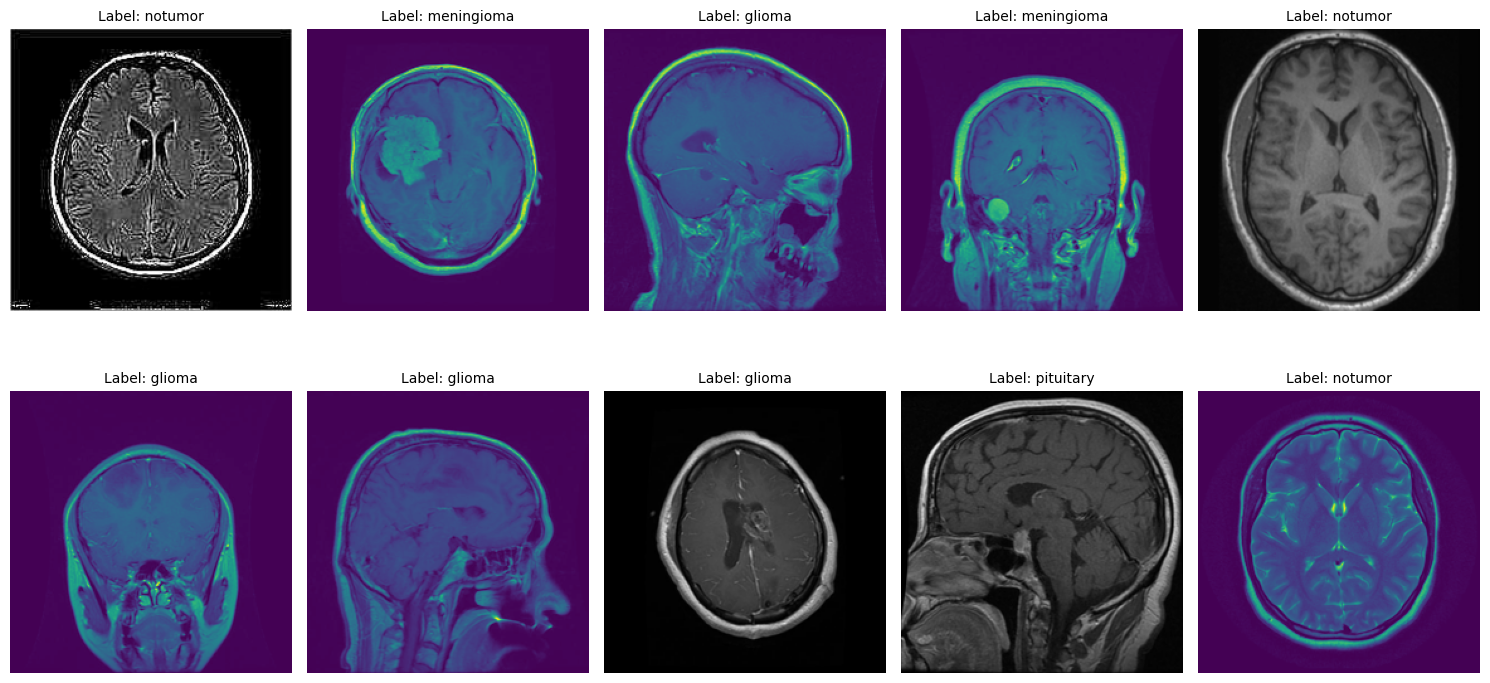

In [7]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# Select random indices for 10 images
random_indices = random.sample(range(len(train_paths)), 10)

# Create a figure to display images in 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    # Load image
    img_path = train_paths[idx]
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize to consistent size

    # Display image
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis
    # Display class label in the second row
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
output_base = '/content/Processed_Training'
os.makedirs(output_base, exist_ok=True)

train_dir = '/content/Training/'

In [9]:
def process_and_save(img_path, save_path):
    # Read and resize
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))

    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold
    _, thresh = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)

    # Denoise with median filter
    median = cv2.medianBlur(thresh, 5)

    # Edge Detection
    edges = cv2.Canny(median, 50, 150)

    # Save processed image (change here if you want to save 'gray', 'thresh', etc.)
    cv2.imwrite(save_path, edges)

In [10]:
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)

    # Create corresponding output folder
    output_label_path = os.path.join(output_base, label)
    os.makedirs(output_label_path, exist_ok=True)

    if os.path.isdir(label_path):
        for img_name in tqdm(os.listdir(label_path), desc=f'Processing {label}'):
            img_path = os.path.join(label_path, img_name)
            save_path = os.path.join(output_label_path, img_name)
            try:
                process_and_save(img_path, save_path)
            except Exception as e:
                print(f"Failed to process {img_path}: {e}")

Processing pituitary: 100%|██████████| 1457/1457 [00:03<00:00, 411.17it/s]


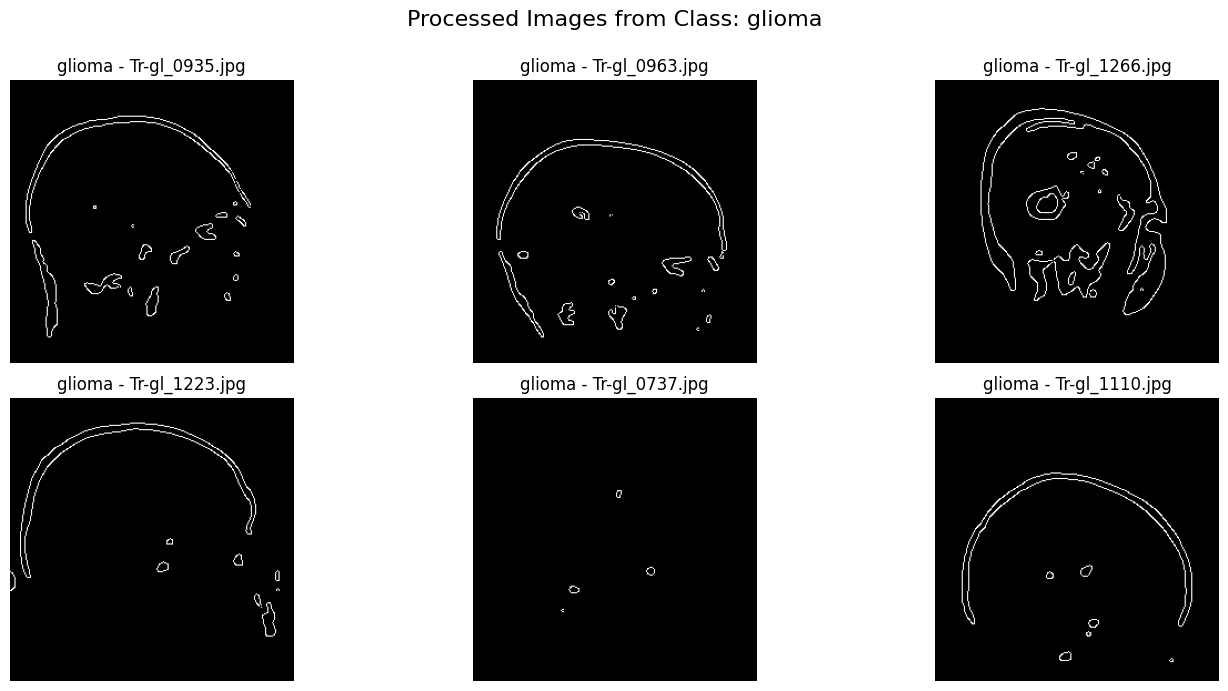

In [11]:
import random

# Path to processed training images
processed_dir = '/content/Processed_Training/'

# Choose random category
categories = os.listdir(processed_dir)
sample_class = random.choice(categories)

sample_class_path = os.path.join(processed_dir, sample_class)
sample_images = random.sample(os.listdir(sample_class_path), 6)

# Plotting
plt.figure(figsize=(15, 7))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_class_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{sample_class} - {img_name}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle(f'Processed Images from Class: {sample_class}', fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

##Assignment

In [12]:
import numpy as np
from skimage.feature import local_binary_pattern

# Set directory
train_dir = '/content/Training/'

# Random class and 3 images
categories = os.listdir(train_dir)
sample_class = random.choice(categories)
sample_class_path = os.path.join(train_dir, sample_class)
sample_images = random.sample(os.listdir(sample_class_path), 3)

# Image processing with all steps
def process_image_steps(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    _, thresh = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)

    median = cv2.medianBlur(thresh, 5)

    edges = cv2.Canny(median, 50, 150)

    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel)

    corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
    corner_img = img.copy()
    if corners is not None:
        corners = np.intp(corners)
        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(corner_img, (x, y), 3, (0, 255, 0), -1)

    # Step 8: Local Binary Pattern (LBP for texture)
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')

    return [img, gray, blurred, thresh, median, edges, morph, corner_img, lbp]

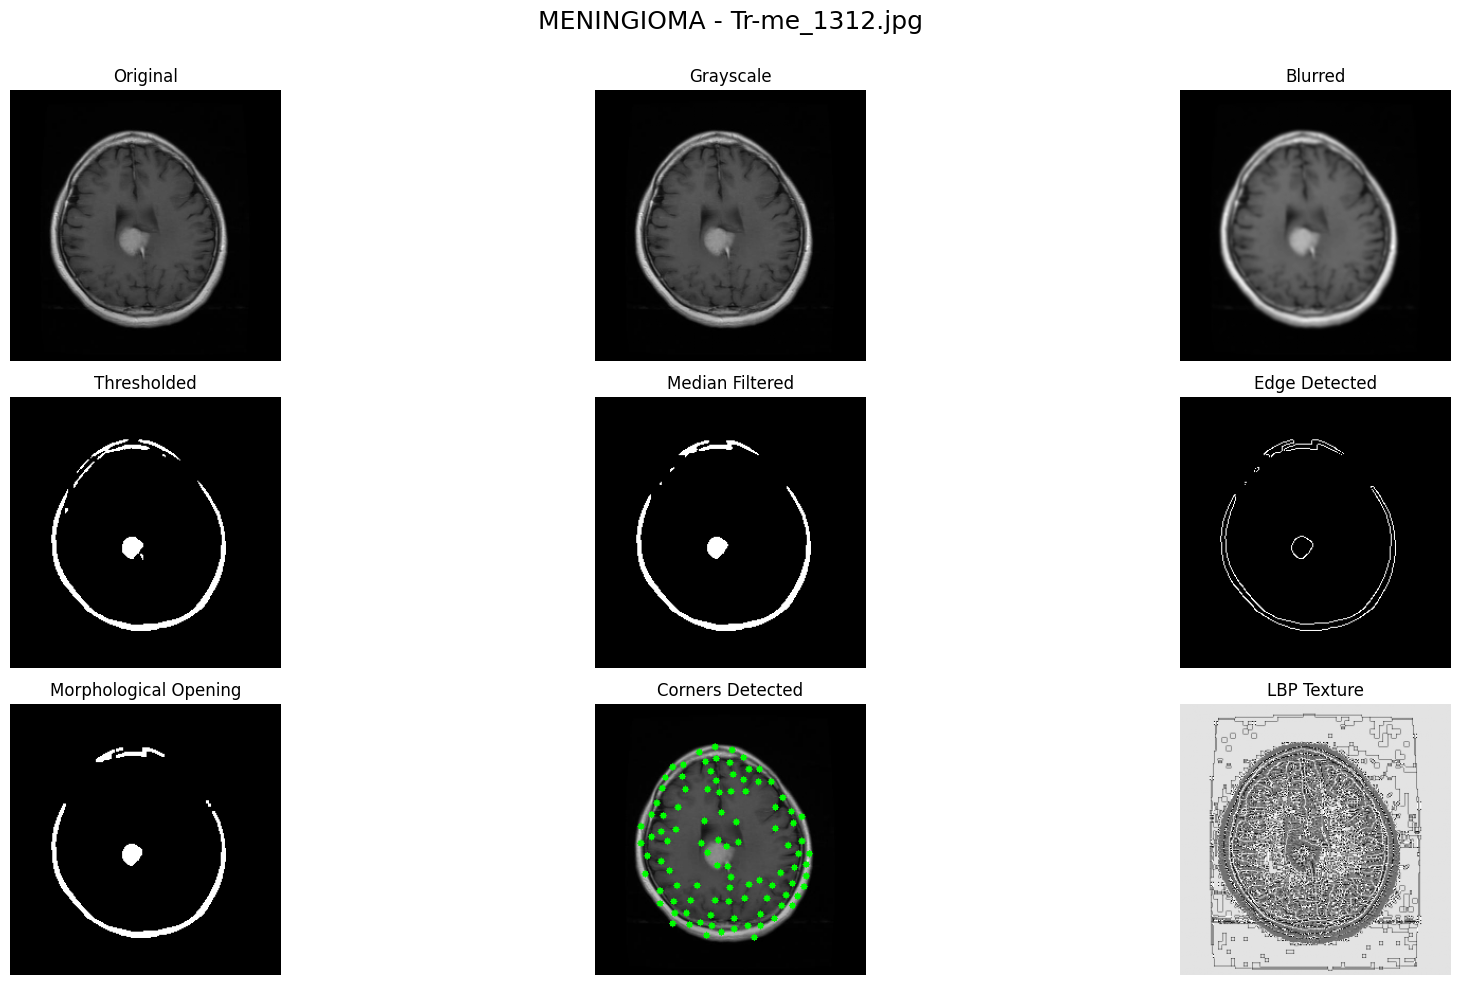

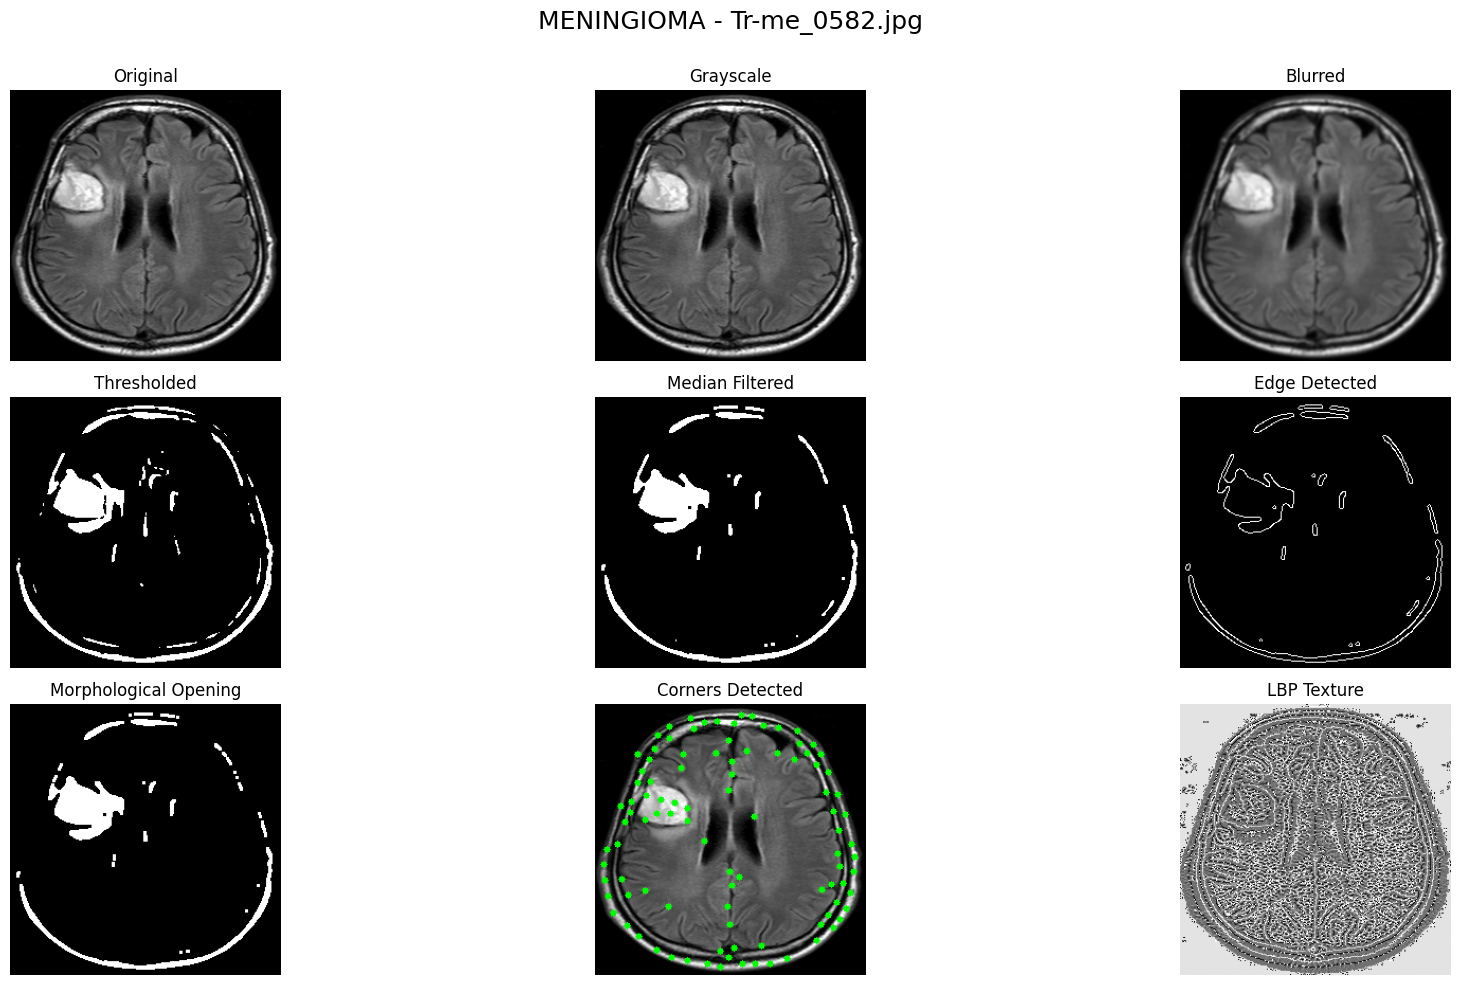

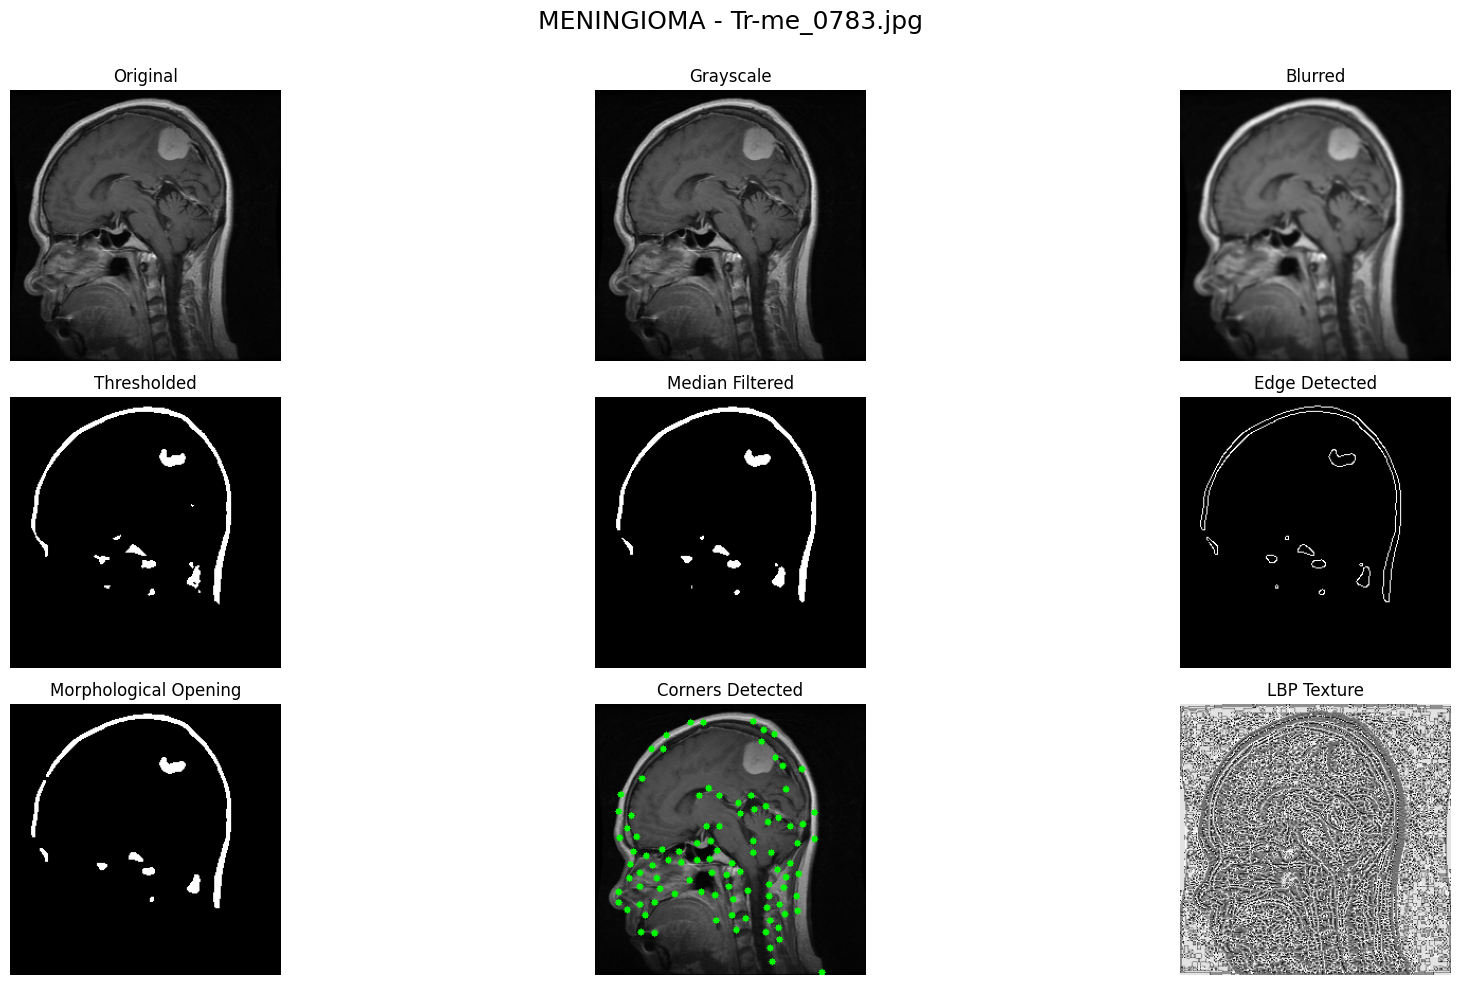

In [13]:
titles = ['Original', 'Grayscale', 'Blurred', 'Thresholded', 'Median Filtered',
          'Edge Detected', 'Morphological Opening', 'Corners Detected', 'LBP Texture']

# Show results for 3 random images
for img_name in sample_images:
    img_path = os.path.join(sample_class_path, img_name)
    results = process_image_steps(img_path)

    plt.figure(figsize=(20, 10))
    for i, result in enumerate(results):
        plt.subplot(3, 3, i + 1)
        plt.imshow(result, cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.suptitle(f"{sample_class.upper()} - {img_name}", fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


## Model

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define constants
IMG_SIZE = 224
BATCH_SIZE = 32

# --- UPDATED ---
# 1. Create an aggressive data generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # Use 20% of training data for validation
    rotation_range=20,      # Randomly rotate images
    width_shift_range=0.1,  # Randomly shift width
    height_shift_range=0.1, # Randomly shift height
    shear_range=0.1,        # Apply shear transformations
    zoom_range=0.1,         # Randomly zoom in
    horizontal_flip=True,   # Allow horizontal flipping
    fill_mode='nearest'     # Fill new pixels after rotation/shift
)

# 2. Create a separate generator for validation: NO augmentation, just rescaling
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2    # Must match the train_datagen
)

# 3. Create the test generator: NO augmentation, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# --- RE-CREATE GENERATORS ---
# Training generator (using subset 'training')
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify this is the training subset
)

# Validation generator (using subset 'validation')
val_gen = val_datagen.flow_from_directory(
    train_dir,  # Point to the same training directory
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # Specify this is the validation subset
    shuffle=False         # No need to shuffle validation data
)

# Test generator
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get all the class labels from the training generator
train_labels = train_gen.classes

# Calculate class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

# Create a dictionary mapping class index to its weight
class_weight_dict = dict(enumerate(class_weights))

print("Class Indices:", train_gen.class_indices)
print("Calculated Class Weights:", class_weight_dict)

Class Indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Calculated Class Weights: {0: np.float64(1.0811258278145695), 1: np.float64(1.0659981343283582), 2: np.float64(0.8955721003134797), 3: np.float64(0.9800600343053173)}


In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze base model initially
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(len(train_gen.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,772,228 (94.50 MB)

 Trainable params: 1,182,980 (4.51 MB)

 Non-trainable params: 23,589,248 (89.99 MB)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Initial Training (frozen base)
# We add the class_weight parameter here
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks,
    class_weight=class_weight_dict  # --- ADDED THIS LINE ---
)

# --- UPDATED FINE-TUNING STRATEGY ---
print("Unfreezing conv5_block for fine-tuning...")
base_model.trainable = True  # First, set the whole base model to trainable

for layer in base_model.layers:
    if not layer.name.startswith('conv5_block'):
        layer.trainable = False

# Re-compile with a very low learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),  # Use a low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Starting fine-tuning...")

fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,  # Increased epochs, EarlyStopping will find the best one
    callbacks=callbacks,
    class_weight=class_weight_dict  # --- ADDED THIS LINE ---
)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 87s 524ms/step - accuracy: 0.4203 - loss: 1.5360 - val_accuracy: 0.2664 - val_loss: 1.3735 - learning_rate: 1.0000e-04
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 62s 433ms/step - accuracy: 0.5825 - loss: 1.0635 - val_accuracy: 0.4943 - val_loss: 1.1071 - learning_rate: 1.0000e-04
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 62s 430ms/step - accuracy: 0.6182 - loss: 0.9542 - val_accuracy: 0.6450 - val_loss: 0.9341 - learning_rate: 1.0000e-04
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 63s 441ms/step - accuracy: 0.6409 - loss: 0.8966 - val_accuracy: 0.6389 - val_loss: 0.9997 - learning_rate: 1.0000e-04
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.6592 - loss: 0.8753
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
143/143 ━━━━━━━━━━━━━━━━━━━━ 61s 427ms/step - accuracy: 0.6593 - loss: 0.8752 - val_accuracy: 0.6775 - val_loss: 0.9694 - learning_rate: 1.0000e-04
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 62s 431ms/st

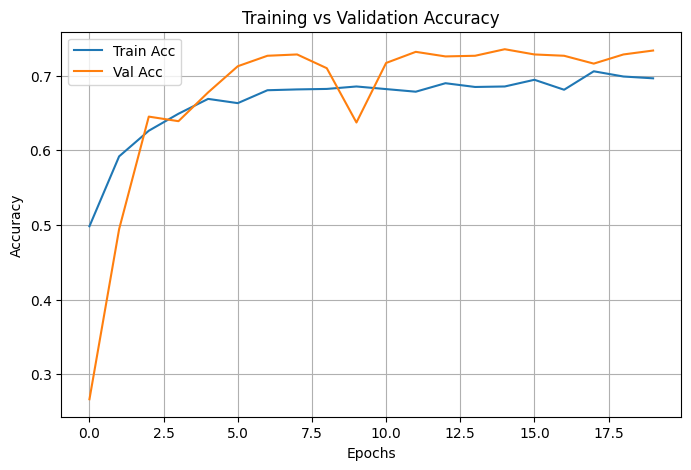

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.6083 - loss: 1.0631
✅ Test Accuracy: 72.85%
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step

Classification Report:

              precision    recall  f1-score   support

      glioma       0.72      0.55      0.62       300
  meningioma       0.56      0.45      0.50       306
     notumor       0.80      0.90      0.84       405
   pituitary       0.76      0.96      0.85       300

    accuracy                           0.73      1311
   macro avg       0.71      0.72      0.70      1311
weighted avg       0.72      0.73      0.72      1311



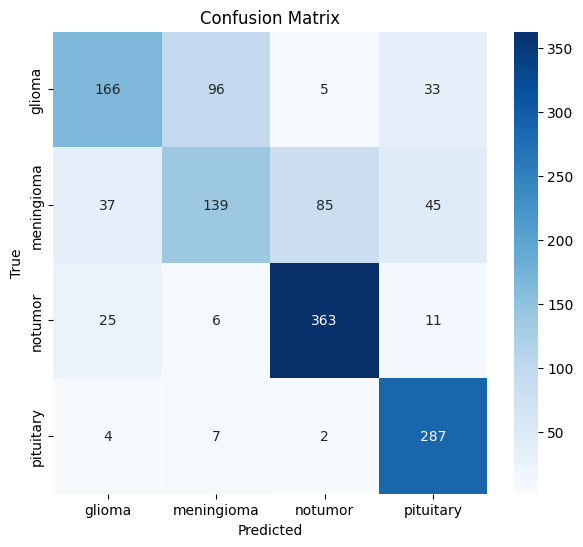

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluation
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

# Confusion Matrix
Y_pred = model.predict(test_gen)
y_pred = np.argmax(Y_pred, axis=1)

print("\nClassification Report:\n")
print(classification_report(test_gen.classes, y_pred, target_names=list(test_gen.class_indices.keys())))

cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
